In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
#%cd ..
#%pwd
#%%
import sys
sys.path.insert(0, "..")
from tcs.tools.tools import Tools
from tcs.automata.fa.dfa import DFA
from tcs.automata.fa.nfa import NFA
from tcs.regexpr.reg_expression import RegEx

Definire un ASFD che riconosce il linguaggio $L\subseteq\{0,1\}^*$ definito
come $$L = \{w| w \mbox{ ogni } 0 \mbox{ in } w \mbox{ è seguito immediatamente da almeno due } 1 \}$$

In [142]:
dfa0 = DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'1': 'q2'},
        'q2': {'0': 'q0', '1': 'q2'}
    },
    initial_state='q0',
    final_states={'q0', 'q2'}
)

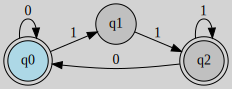

In [143]:
dfa0.draw()

In [144]:
dfa0.report_computation(Tools.tokens('001011001'))

q0	 001011001
q0	 01011001
q0	 1011001
q1	 011001
Incomplete computation: string rejected


In [145]:
c, completed, accepted = dfa0.compute(Tools.tokens('00111001'))

In [146]:
g=dfa0.computation(Tools.tokens('00111001'))

In [147]:
dfa0.step(g)

q0	 00111001


In [148]:
dfa00 = DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'1': 'q0', '0': 'q1'},
        'q1': {'1': 'q2'},
        'q2': {'1': 'q0'}
    },
    initial_state='q0',
    final_states={'q0'}
)

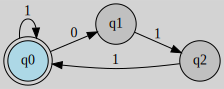

In [149]:
dfa00.draw()

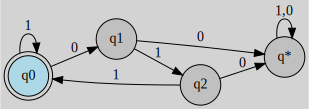

In [150]:
dfa00.total.draw()

In [151]:
dfa00.report_computation(Tools.tokens('0111011011'))

q0	 0111011011
q1	 111011011
q2	 11011011
q0	 1011011
q0	 011011
q1	 11011
q2	 1011
q0	 011
q1	 11
q2	 1
q0	 _
Completed computation: string accepted


In [152]:
nfa0 = NFA(
    states={'q0', 'q1', 'q2', 'q3'},
    input_symbols={'a', 'b'},
    delta={
        'q0': {'a': {'q0', 'q1'}, 'b': {'q0'}, '': {'q1'}},
        'q1': {'a': {'q2'}},
        'q2': {'a': {'q3'}}
    },
    initial_state='q0',
    final_states={'q3'}
)

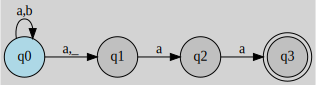

In [153]:
nfa0.draw()

In [154]:
nfa0.report_computation(Tools.tokens('aa'))

aa	{q0}
a	{q2, q0, q1}
_	{q2, q3, q0, q1}
Completed computation: string accepted


In [165]:
nfa0.report_random_deterministic_path(Tools.tokens('aa'))

q0	 aa
q1	 a
q2	 _
Completed path: string rejected


In [119]:
import tcs.automata.fa.nfa_configuration as nfac
nfac.NFAConfiguration(states={idc.state},
                             list_of_tokens = idc.list_of_tokens,
                             automaton = idc.automaton)

{'list_of_tokens': ('a', 'a'), 'automaton': NFA{'states': {'q2', 'q3', 'q0', 'q1'}, 'input_symbols': {'a', 'b'}, 'initial_state': 'q0', 'final_states': {'q3'}, 'all_chars_input': True, 'delta': {'q0': {'a': {FATransition{'state': 'q0'}, FATransition{'state': 'q1'}}, 'b': {FATransition{'state': 'q0'}}, '': {FATransition{'state': 'q1'}}}, 'q1': {'a': {FATransition{'state': 'q2'}}}, 'q2': {'a': {FATransition{'state': 'q3'}}}}}, 'states': {'q0'}}

In [117]:
idc.as_nfa_config

In [124]:
nfa0._next_random_deterministic_configuration(idc).state

'q2'

In [46]:
nfa0._epsilon_closure(in_conf)

{'list_of_tokens': ('a', 'a'), 'automaton': NFA{'states': {'q2', 'q3', 'q0', 'q1'}, 'input_symbols': {'a', 'b'}, 'initial_state': 'q0', 'final_states': {'q3'}, 'all_chars_input': True, 'delta': {'q0': {'a': {FATransition{'state': 'q0'}, FATransition{'state': 'q1'}}, 'b': {FATransition{'state': 'q0'}}, '': {FATransition{'state': 'q1'}}}, 'q1': {'a': {FATransition{'state': 'q2'}}}, 'q2': {'a': {FATransition{'state': 'q3'}}}}}, 'states': {'q0', 'q1'}}

In [69]:
nfa0._initial_deterministic_configuration(Tools.tokens('aa')).state

'q1'

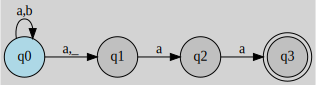

In [127]:
nfa0.draw()

In [139]:
nfa0.report_random_deterministic_path(Tools.tokens('aa'))

q0	 aa
q1	 a
q2	 _
Completed path: string rejected


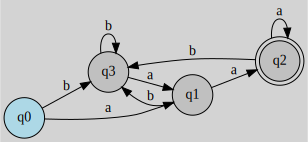

In [73]:
nfa0.dfa.renamed_states.draw()

In [10]:
nfa0.report_computation(Tools.tokens('abbabb'))

abbabb	{q1, q0}
bbabb	{q2, q1, q0}
babb	{q1, q0}
abb	{q1, q0}
bb	{q2, q1, q0}
b	{q1, q0}
_	{q1, q0}
Completed computation: string rejected


In [75]:
nfa0.report_random_deterministic_path(Tools.tokens('abbabb'))

q0	 abbabb
Incomplete path: string rejected


In [76]:
print(nfa0.dfa)

symbols: a,b
states: q0,q0.q1,q0.q1.q2,q0.q1.q2.q3
start state: q0
final states: q0.q1.q2.q3
transitions
	 (q0,a) -> q0.q1.q2
	 (q0,b) -> q0.q1
	 (q0.q1,a) -> q0.q1.q2
	 (q0.q1,b) -> q0.q1
	 (q0.q1.q2,a) -> q0.q1.q2.q3
	 (q0.q1.q2,b) -> q0.q1
	 (q0.q1.q2.q3,a) -> q0.q1.q2.q3
	 (q0.q1.q2.q3,b) -> q0.q1


In [77]:
dfa=dfa0#.total

In [78]:
print(dfa)

symbols: 0,1
states: q0,q1,q2
start state: q0
final states: q0,q2
transitions
	 (q0,0) -> q0
	 (q0,1) -> q1
	 (q1,1) -> q2
	 (q2,0) -> q0
	 (q2,1) -> q2


In [81]:
print(dfa.delta)

{'q0': {'0': FATransition{'state': 'q0'}, '1': FATransition{'state': 'q1'}}, 'q1': {'1': FATransition{'state': 'q2'}}, 'q2': {'0': FATransition{'state': 'q0'}, '1': FATransition{'state': 'q2'}}}


In [82]:
nfa1=dfa0.nfa

In [83]:
nfa1.delta


{'q0': {'0': {FATransition{'state': 'q0'}},
  '1': {FATransition{'state': 'q1'}}},
 'q1': {'1': {FATransition{'state': 'q2'}}},
 'q2': {'0': {FATransition{'state': 'q0'}},
  '1': {FATransition{'state': 'q2'}}}}

In [84]:
print(nfa1.dfa)

symbols: 0,1
states: q0,q1,q2
start state: q0
final states: q0,q2
transitions
	 (q0,0) -> q0
	 (q0,1) -> q1
	 (q1,1) -> q2
	 (q2,0) -> q0
	 (q2,1) -> q2


In [85]:
print(nfa0)

symbols: a,b
states: q0,q1,q2,q3
start state: q0
final states: q3
transitions
	 (q0,) -> {q1}
	 (q0,a) -> {q1, q0}
	 (q0,b) -> {q0}
	 (q1,a) -> {q2}
	 (q2,a) -> {q3}


In [86]:
print(dfa0)

symbols: 0,1
states: q0,q1,q2
start state: q0
final states: q0,q2
transitions
	 (q0,0) -> q0
	 (q0,1) -> q1
	 (q1,1) -> q2
	 (q2,0) -> q0
	 (q2,1) -> q2


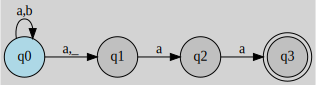

In [87]:
nfa0.draw()

In [88]:
nfa2 = NFA(
    states={'q0', 'q1', 'q2', 'q3'},
    input_symbols={'a', 'b'},
    delta={
        'q0': {'': {'q0', 'q1'}, 'b': {'q0'}, '': {'q1'}},
        'q1': {'a': {'q2'}},
        'q2': {'a': {'q3'}}
    },
    initial_state='q0',
    final_states={'q3'}
)

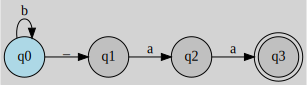

In [89]:
nfa2.draw()

In [ ]:
nfa2.no_epsilon.draw()

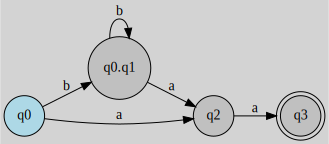

In [38]:
nfa2.dfa.draw()

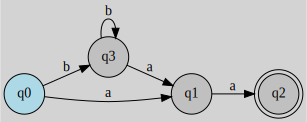

In [39]:
nfa2.dfa.renamed_states.draw()

In [40]:
print(nfa2.dfa.rg)

terminals: a,b
non terminals: Aq0,Aq0.q1,Aq2,Aq3
axiom: Aq0
productions
	(Aq0) -> (b Aq0.q1) | (a Aq2) 
	(Aq0.q1) -> (b Aq0.q1) | (a Aq2) 
	(Aq2) -> (a) | (a Aq3)


In [26]:
dfa1 = DFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q3', '1': 'q4'},
        'q1': {'0': 'q3', '1': 'q0'},
        'q2': {'0': 'q2', '1': 'q1'},
        'q3': {'0': 'q0'},
        'q4': {'0': 'q0'}
    },
    initial_state='q0',
    final_states={'q1'}
)

dfa2 = DFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4', 'q5'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q2', '1': 'q4'},
        'q1': {'0': 'q3', '1': 'q0'},
        'q2': {'0': 'q2', '1': 'q1'},
        'q3': {'0': 'q0'},
        'q4': {'0': 'q0'},
        'q5': {'0': 'q1'}
    },
    initial_state='q0',
    final_states={'q5'}
)

In [27]:
dfa00 = DFA(
    states={'q0', 'q1'},
    input_symbols={'id', 'expr'},
    delta={
        'q0': {'id': 'q0', 'expr': 'q1'},
        'q1': {'id': 'q0', 'expr': 'q0'}
    },
    initial_state='q0',
    final_states={'q1'}
)

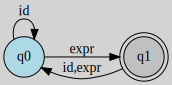

In [28]:
dfa00.draw()

In [29]:
dfa00.report_computation(('expr', 'expr', 'id'))

q0	 (expr expr id)
q1	 (expr id)
q0	 (id)
q0	 ()
Completed computation: string rejected


In [30]:
gr=dfa00.rg
print(gr)

terminals: expr,id
non terminals: Aq0,Aq1
axiom: Aq0
productions
	(Aq0) -> (expr Aq1) | (expr) | (id Aq0) 
	(Aq1) -> (expr Aq0) | (id Aq0)


In [31]:
d00=gr.random_derivation()
print(d00)

(Aq0)      (Aq0) -> (id Aq0)
(id Aq0)   (Aq0) -> (expr)
(id expr)


In [32]:
dfa2.report_computation(Tools.tokens('0010'))

q0	 0010
q2	 010
q2	 10
q1	 0
q3	 _
Completed computation: string rejected


In [33]:
dfa00.report_computation(Tools.tokens('expr:expr:id', separator=':'))

q0	 (expr expr id)
q1	 (expr id)
q0	 (id)
q0	 ()
Completed computation: string rejected


In [34]:
nfa = NFA(
    states={'q0', 'q1', 'q2', 'q3'},
    input_symbols={'digit', 'operator'},
    delta={
        'q0': {'digit': {'q0', 'q1'}, 'operator': {'q0'}, '': {'q1'}},
        'q1': {'digit': {'q2'}},
        'q2': {'digit': {'q3'}}
    },
    initial_state='q0',
    final_states={'q3'}
)


nfa1 = NFA(
    states={'q0', 'q1', 'q2', 'q3'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': {'q0', 'q1'}, '1': {'q0'}},
        'q1': {'0': {'q2'}},
        'q2': {'0': {'q3'}}
    },
    initial_state='q0',
    final_states={'q3'}
)

In [5]:
dfa3 = DFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4', 'q5'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q1', '1': 'q2'},
        'q1': {'0': 'q5', '1': 'q3'},
        'q2': {'0': 'q4', '1': 'q5'},
        'q3': {'0': 'q5', '1': 'q1'},
        'q4': {'0': 'q2', '1': 'q5'},
        'q5': {'0': 'q5', '1': 'q5'}
    },
    initial_state='q0',
    final_states={'q1','q2','q3','q4'}
)

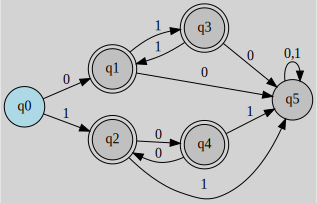

In [6]:
dfa3.draw()

In [7]:
dfa3.report_computation(Tools.tokens('011'))

q0	 011
q1	 11
q3	 1
q1	 _
Completed computation: string accepted


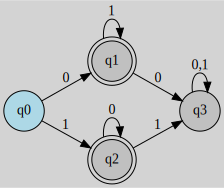

In [10]:
dfa3.minimal.renamed_states.draw()

In [11]:
# ogni 0 è seguito immediatamente da almeno due 1
dfa4 = DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q1', '1': 'q0'},
        'q1': {'1': 'q2'},
        'q2': {'1': 'q0'}
    },
    initial_state='q0',
    final_states={'q0'}
)

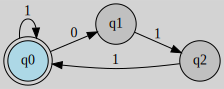

In [12]:
dfa4.draw()

In [16]:
dfa4.report_computation(Tools.tokens('00111'))

q0	 00111
q1	 0111
Incomplete computation: string rejected


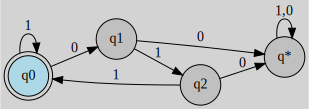

In [17]:
dfa4.total.draw()

In [25]:
# non epsilon; primo e ultimo simbolo sono uguali
dfa5 = DFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q1', '1': 'q2'},
        'q1': {'0': 'q1', '1': 'q3'},
        'q2': {'0': 'q4', '1': 'q2'},
        'q3': {'0': 'q1', '1': 'q3'},
        'q4': {'0': 'q4', '1': 'q2'}
    },
    initial_state='q0',
    final_states={'q1', 'q2'}
)

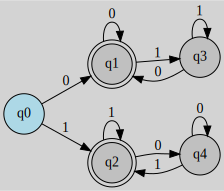

In [26]:
dfa5.draw()

In [28]:
dfa5.report_computation(Tools.tokens('0110'))

q0	 0110
q1	 110
q3	 10
q3	 0
q1	 _
Completed computation: string accepted


In [29]:
# numero pari di 0 o esattamente due 1
dfa6 = DFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4', 'q5'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q1', '1': 'q2'},
        'q1': {'0': 'q0', '1': 'q3'},
        'q2': {'0': 'q3', '1': 'q4'},
        'q3': {'0': 'q2', '1': 'q5'},
        'q4': {'0': 'q5'},
        'q5': {'0': 'q4'}
    },
    initial_state='q0',
    final_states={'q0', 'q2', 'q4', 'q5'}
)

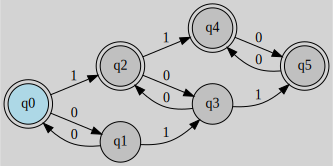

In [30]:
dfa6.draw()

In [33]:
dfa6.report_computation(Tools.tokens('0100'))

q0	 0100
q1	 100
q3	 00
q2	 0
q3	 _
Completed computation: string rejected


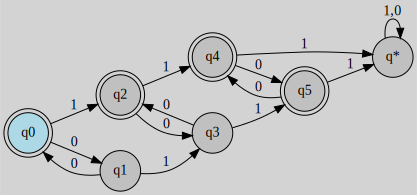

In [34]:
dfa6.total.draw()

In [37]:
# esattamente due 0 e almeno due 1
dfa7 = DFA(
    states={'q00', 'q10', 'q01', 'q11', 'q20', 'q02', 'q12', 'q21', 'q22'},
    input_symbols={'0', '1'},
    delta={
        'q00': {'0': 'q10', '1': 'q01'},
        'q10': {'0': 'q20', '1': 'q11'},
        'q01': {'0': 'q11', '1': 'q02'},
        'q11': {'0': 'q21', '1': 'q12'},
        'q20': {'1': 'q21'},
        'q02': {'0': 'q12', '1': 'q02'},
        'q12': {'0': 'q22', '1': 'q12'},
        'q21': {'1': 'q22'},
        'q22': {'1': 'q22'}
    },
    initial_state='q00',
    final_states={'q22'}
)

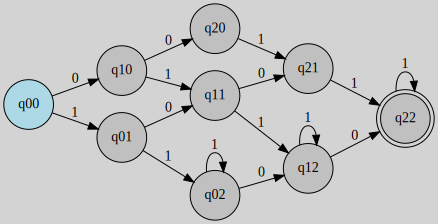

In [40]:
dfa7.draw()

In [45]:
dfa7.report_computation(Tools.tokens('110010'))

q00	 110010
q01	 10010
q02	 0010
q12	 010
q22	 10
q22	 0
Incomplete computation: string rejected


In [1]:
nfa.draw()

NameError: name 'nfa' is not defined

In [58]:
nfa_nn=nfa.nfa_no_null

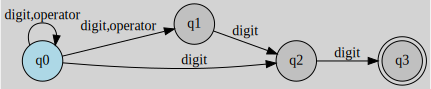

In [59]:
nfa_nn.draw()

In [62]:
nfa.report_computation(('operator', 'operator', 'digit'))

(operator operator digit) 	{q1, q0}
(operator digit) 	{q1, q0}
(digit) 	{q1, q0}
() 	{q1, q2, q0}
Completed computation: string rejected


In [63]:
nfa1.report_computation(Tools.tokens('0100'))

0100	{q0}
100	{q1, q0}
00	{q0}
0	{q1, q0}
_	{q1, q2, q0}
Completed computation: string rejected


In [70]:
# lunghezza multiplo di 5 più 1
dfa8 = DFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q1', '1': 'q1'},
        'q1': {'0': 'q2', '1': 'q2'},
        'q2': {'0': 'q3', '1': 'q3'},
        'q3': {'0': 'q4', '1': 'q4'},
        'q4': {'0': 'q0', '1': 'q0'}
    },
    initial_state='q0',
    final_states={'q1'}
)

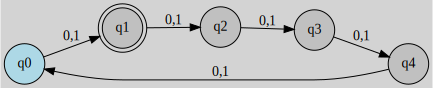

In [72]:
dfa8.draw()

In [74]:
dfa8.report_computation(Tools.tokens('1100010'))

q0	 1100010
q1	 100010
q2	 00010
q3	 0010
q4	 010
q0	 10
q1	 0
q2	 _
Completed computation: string rejected


In [75]:
# lunghezza almeno 4
dfa9 = DFA(
    states={'q0', 'q1', 'q2', 'q3', 'q4'},
    input_symbols={'0', '1'},
    delta={
        'q0': {'0': 'q1', '1': 'q1'},
        'q1': {'0': 'q2', '1': 'q2'},
        'q2': {'0': 'q3', '1': 'q3'},
        'q3': {'0': 'q4', '1': 'q4'},
        'q4': {'0': 'q4', '1': 'q4'}
    },
    initial_state='q0',
    final_states={'q4'}
)

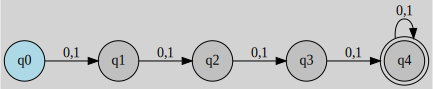

In [76]:
dfa9.draw()

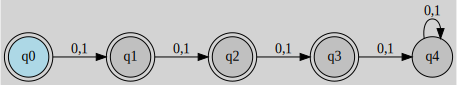

In [86]:
dfa9.complement.draw()